In [61]:
from helpers import npNicePrint
import numpy as np
import ast

#helpers.npNicePrint(arr)


data = """R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)"""



with open("input_18.txt", 'r') as f:
    data = f.read().strip()
instructions = []

hexa_dir = {0: "R", 1: "D", 2: "L", 3: "U"}

for r in data.split("\n"):
    a,b,c = r.split()
    
    instructions.append([hexa_dir[int(c[-2], 16)],int(c[2:-2], 16), c[1:-1]])
    #instructions.append([a,int(b), c[1:-1]])

instructions

[['R', 160476, '#272dc0'],
 ['U', 188866, '#2e1c23'],
 ['R', 355417, '#56c590'],
 ['U', 231991, '#38a373'],
 ['R', 157437, '#266fd0'],
 ['U', 396749, '#60dcd3'],
 ['R', 136320, '#214800'],
 ['U', 104863, '#1999f3'],
 ['R', 185107, '#2d3130'],
 ['U', 329906, '#508b23'],
 ['R', 283681, '#454210'],
 ['U', 103445, '#194153'],
 ['R', 220266, '#35c6a0'],
 ['D', 538214, '#836661'],
 ['R', 142610, '#22d120'],
 ['U', 182263, '#2c7f73'],
 ['R', 271639, '#425170'],
 ['U', 293752, '#47b783'],
 ['R', 120076, '#1d50c0'],
 ['U', 315334, '#4cfc63'],
 ['R', 48969, '#0bf490'],
 ['U', 412905, '#64ce93'],
 ['R', 163065, '#27cf90'],
 ['U', 64253, '#0fafd3'],
 ['R', 371976, '#5ad080'],
 ['U', 58628, '#0e5043'],
 ['R', 190227, '#2e7130'],
 ['U', 286354, '#45e923'],
 ['L', 249954, '#3d0622'],
 ['U', 62188, '#0f2ec3'],
 ['R', 92022, '#167760'],
 ['U', 314975, '#4ce5f3'],
 ['L', 92022, '#167762'],
 ['U', 319315, '#4df533'],
 ['L', 301886, '#49b3e2'],
 ['D', 159861, '#270751'],
 ['R', 287369, '#462890'],
 ['D', 

In [62]:
directions = {"U": np.array((0,-1)), "D": np.array((0, 1)), "L": np.array((-1, 0)), "R": np.array((1,0))}

movements = {"|": {"S": "S", "N": "N", "E": ["N", "S"], "W": ["N", "S"]},
             "-": {"E": "E", "W": "W", "N": ["W", "E"], "S": ["W", "E"]},
             "\\": {"S": "E", "W": "N", "E": "S", "N": "W"},
             "/": {"S": "W", "E": "N", "N": "E", "W": "S"},
             ".": {"S": "S", "E": "E", "W": "W", "N": "N"}
            }

In [63]:
coords = set()
x_coords = [0]
y_coords = [0]
location = (0,0)
edge_length = 0
for direction, num, color in instructions:
    location = location + directions[direction]*num
    #coords.add(tuple(location))
    x_coords.append(tuple(location)[0])
    y_coords.append(tuple(location)[1])
    edge_length += num
B = edge_length
A = polygon_area_numpy(x_coords, y_coords)
#print(A)
I = A - ((B/2) - 1)
print(I+B)

52240187443190.0


In [49]:
y_coords

[0, 0, 5, 5, 7, 7, 9, 9, 7, 7, 5, 5, 2, 2, 0]

In [46]:
A

18.0

In [26]:
x_coords, y_coords

([0, 6, 6, 4, 4, 6, 6, 1, 1, 0, 0, 2, 2, 0, 0],
 [0, 0, 5, 5, 7, 7, 9, 9, 7, 7, 5, 5, 2, 2, 0])

In [50]:
import numpy as np

def polygon_area_numpy(x, y):
    x = np.array(x)
    y = np.array(y)
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

# Example usage with x and y coordinates of the polygon vertices
x_coords = [0, 6, 6, 4, 4, 6, 6, 1, 1, 0, 0, 2, 2, 0, 0]
y_coords = [0, 0, 5, 5, 7, 7, 9, 9, 7, 7, 5, 5, 2, 2, 0]

area = polygon_area_numpy(x_coords, y_coords)
print("Area of the polygon:", area)


Area of the polygon: 42.0


In [59]:
import numpy as np

def polygon_area_numpy(x, y):
    x = np.array(x, dtype=np.float64)
    y = np.array(y, dtype=np.float64)
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

# Example usage with x and y coordinates of the polygon vertices
#x_coords = [0, 2, 2, 0]
#y_coords = [0, 0, 3, 3]

area = int(polygon_area_numpy(x_coords, y_coords)) #+ edge_length
print("Area of the polygon:", area)

Area of the polygon: 952404941483


In [41]:
def shoelace_formula(vertices):
    # Assuming vertices is a list of (x, y) coordinates of the polygon vertices
    n = len(vertices)
    
    # Ensure the polygon is closed
    if vertices[0] != vertices[-1]:
        vertices.append(vertices[0])

    # Apply the shoelace formula
    area = 0
    for i in range(n):
        area += (vertices[i][0] * vertices[(i + 1) % n][1]) - (vertices[(i + 1) % n][0] * vertices[i][1])

    area = abs(area) / 2
    return area



shoelace_formula(list(zip(x_coords, y_coords))[:-1])

42.0

In [31]:
from scipy.spatial import ConvexHull

def convex_polygon_area(x, y):
    points = list(zip(x, y))
    hull = ConvexHull(points)
    return hull.volume  # The volume attribute of ConvexHull gives the area in 2D
convex_polygon_area(x_coords, y_coords)

53.0

In [8]:
coords

{(5411, 744712),
 (818608, 247368),
 (586383, 56407),
 (609066, 912953),
 (572380, 356353),
 (729049, 56407),
 (0, 55210),
 (5411, 1089870),
 (818608, 592526),
 (497056, 654207),
 (0, 499),
 (5411, 522508),
 (104464, 1186328),
 (609066, 690749),
 (247130, 1186328),
 (609066, 636038),
 (389796, 1186328),
 (0, 400368),
 (1096709, 1186328),
 (497056, 999365),
 (0, 345657),
 (1186328, 989929),
 (818608, 370322),
 (5411, 867666),
 (497056, 432003),
 (5411, 812955),
 (497056, 377292),
 (609066, 1035907),
 (609066, 981196),
 (609066, 413834),
 (461937, 32662),
 (851736, 919647),
 (818608, 715480),
 (994402, 919647),
 (0, 123453),
 (5411, 1158113),
 (497056, 722450),
 (1137068, 919647),
 (5411, 590751),
 (818608, 93407),
 (390088, 1186328),
 (609066, 758992),
 (675420, 1186328),
 (0, 468611),
 (1186328, 1112883),
 (497056, 1067608),
 (360788, 0),
 (5411, 935909),
 (818608, 438565),
 (497056, 500246),
 (593384, 56407),
 (579381, 356353),
 (609066, 1104150),
 (736050, 56407),
 (537887, 356353),


<IPython.core.display.Javascript object>


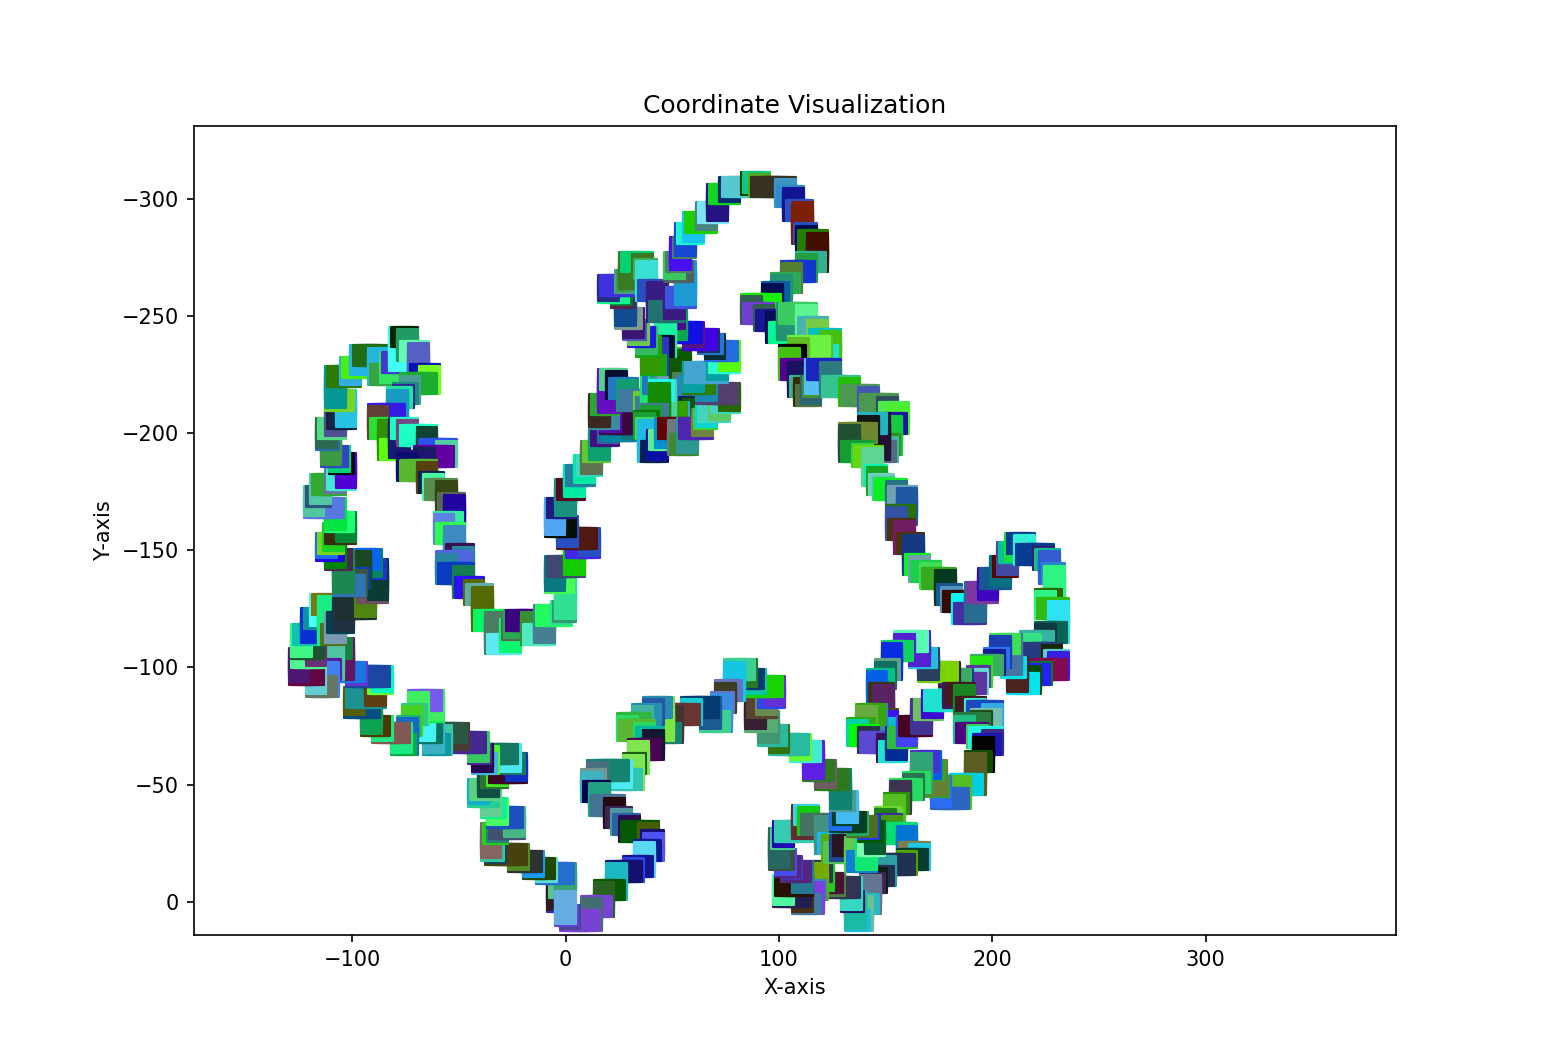

In [33]:
%matplotlib notebook

import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

def visualize_coordinates(data):
    # Extract coordinates and colors
    coordinates, colors = zip(*data.items())
    x, y = zip(*coordinates)

    # Plot the points
    plt.scatter(x, y, c=colors, marker='s', s=100)

    # Invert y-axis to have (0, 0) at the top left
    plt.gca().invert_yaxis()

    # Set axis labels
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    # Set plot title
    plt.title('Coordinate Visualization')

    # Display the plot
    plt.show()
    
def points_within_polygon(polygon):
    # Get the bounding box of the polygon
    minx, miny, maxx, maxy = polygon.bounds

    # Generate a grid of points within the bounding box
    x_range = np.arange(int(minx), int(maxx) + 1)
    y_range = np.arange(int(miny), int(maxy) + 1)
    points = np.array(np.meshgrid(x_range, y_range)).T.reshape(-1, 2)

    # Filter out points that fall inside the polygon
    points_within = [point for point in points if polygon.contains(Point(point))]

    return points_within


polygon =  Polygon(list(coords.keys()))

visualize_coordinates(coords)

#len(points_within_polygon(polygon)) + len(list(coords.keys()))

In [20]:
coords

{(1, 0): '#70c710',
 (2, 0): '#70c710',
 (3, 0): '#70c710',
 (4, 0): '#70c710',
 (5, 0): '#70c710',
 (6, 0): '#70c710',
 (6, 1): '#0dc571',
 (6, 2): '#0dc571',
 (6, 3): '#0dc571',
 (6, 4): '#0dc571',
 (6, 5): '#0dc571',
 (5, 5): '#5713f0',
 (4, 5): '#5713f0',
 (4, 6): '#d2c081',
 (4, 7): '#d2c081',
 (5, 7): '#59c680',
 (6, 7): '#59c680',
 (6, 8): '#411b91',
 (6, 9): '#411b91',
 (5, 9): '#8ceee2',
 (4, 9): '#8ceee2',
 (3, 9): '#8ceee2',
 (2, 9): '#8ceee2',
 (1, 9): '#8ceee2',
 (1, 8): '#caa173',
 (1, 7): '#caa173',
 (0, 7): '#1b58a2',
 (0, 6): '#caa171',
 (0, 5): '#caa171',
 (1, 5): '#7807d2',
 (2, 5): '#7807d2',
 (2, 4): '#a77fa3',
 (2, 3): '#a77fa3',
 (2, 2): '#a77fa3',
 (1, 2): '#015232',
 (0, 2): '#015232',
 (0, 1): '#7a21e3',
 (0, 0): '#7a21e3'}

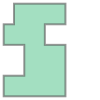

In [26]:
polygon

62

In [1]:


#70c710

SyntaxError: invalid syntax (Temp/ipykernel_22644/4113997099.py, line 1)